In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Reading data

In [2]:
df = pd.read_csv('/Users/easydong/DataspellProjects/timeseries/assignment/AirPassengers.csv',header=None)
df.columns = ['month', 'passengers']
df.index = pd.to_datetime(df.index)
df.set_index('month',inplace=True)
df.head()

,passengers
month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


[]

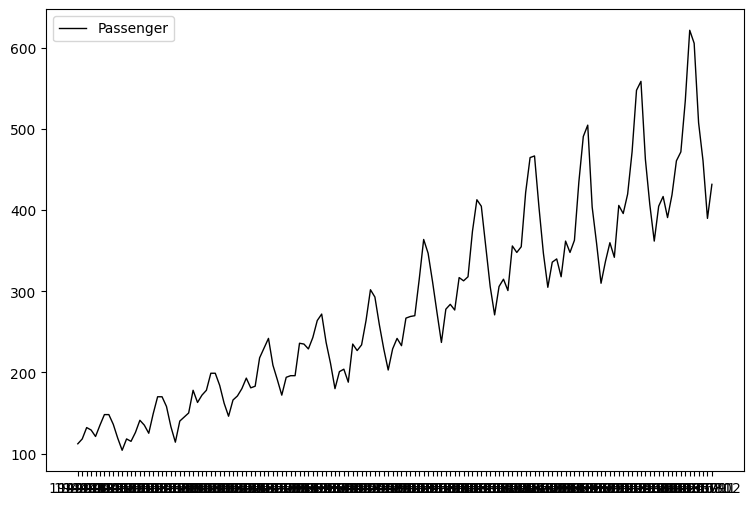

In [3]:
f, axes = plt.subplots(nrows=1, ncols=1, figsize= (9, 2*3))
axes.plot(df, color='black', linewidth=1, label='Passenger')
axes.legend()
plt.plot()

# ADF and KPSS TEST


In [4]:
def adf_test(dataframe):
    result = adfuller(dataframe)
    print(f'Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical values: {result[4]}')

def kpss_test(dataframe):
    result = kpss(dataframe)
    print(f'Statistics: {result[0]}')
    print(f'bounded p-value: {result[1]}')
    print(f'Critical values: {result[3]}')


In [5]:
adf_test(df)
print('---' * 40)
kpss_test(df)

Statistics: 0.8153688792060435
p-value: 0.9918802434376409
Critical values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
------------------------------------------------------------------------------------------------------------------------
Statistics: 1.6513122354165206
bounded p-value: 0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


passenger time-series are non-stationary.

In [6]:
df_log_differenced = np.log(df).diff().dropna()

<Axes: xlabel='month'>

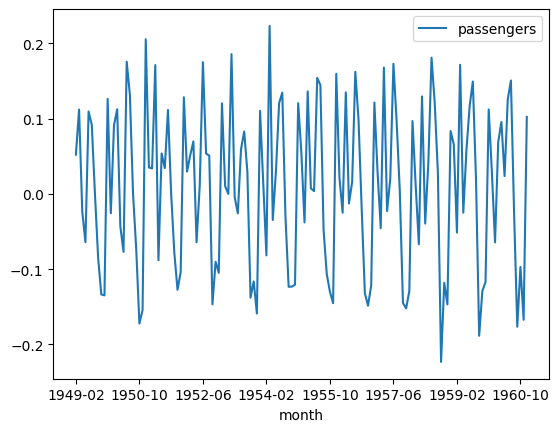

In [7]:
df_log_differenced.plot()

In [8]:
adf_test(df_log_differenced)
print('---' * 40)
kpss_test(df_log_differenced)

Statistics: -2.7171305983880822
p-value: 0.07112054815086723
Critical values: {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}
------------------------------------------------------------------------------------------------------------------------
Statistics: 0.03830446954674063
bounded p-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [9]:
df_seasonal_difference = np.log(df).diff().diff(12).dropna()

<Axes: xlabel='month'>

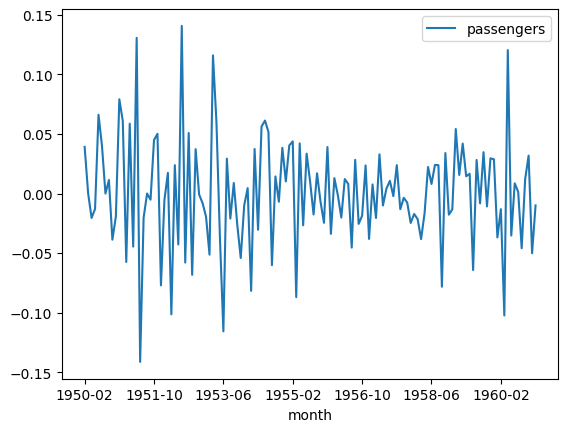

In [10]:
df_seasonal_difference.plot()

In [11]:
adf_test(df_seasonal_difference)
print('---' * 40)
kpss_test(df_seasonal_difference)

Statistics: -4.443324941831116
p-value: 0.00024859123113841266
Critical values: {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
------------------------------------------------------------------------------------------------------------------------
Statistics: 0.07319096983125448
bounded p-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# ACF, PACF

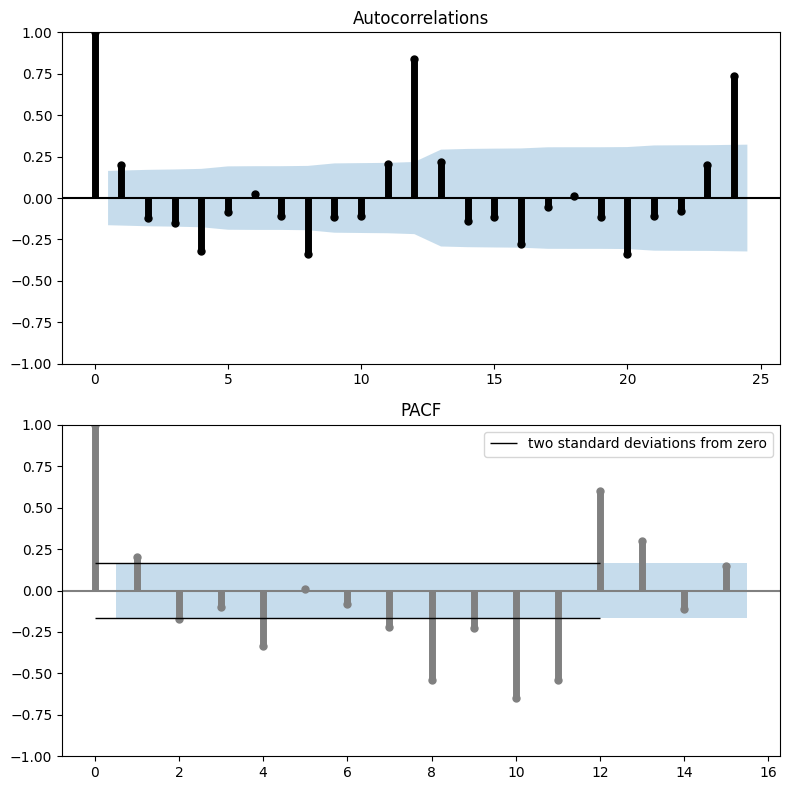

In [12]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,2*4))
plot_acf(df_log_differenced, lags= 24, ax=axes[0], title='Autocorrelations',
         color = 'black', vlines_kwargs={'colors' : 'black', 'linewidth' : 5})
plot_pacf(df_log_differenced, lags=15,ax=axes[1], method='ols', title='PACF', color='gray',
          vlines_kwargs={'colors': 'gray', 'linewidth':5})

axes[1].hlines(xmin=0,xmax=12,y=2*np.sqrt(1/len(df_log_differenced)), label='two standard deviations from zero', color='black', linewidth=1)
axes[1].hlines(xmin=0,xmax=12,y=-2*np.sqrt(1/len(df_log_differenced)), color='black', linewidth=1)

axes[1].legend()
plt.tight_layout()
plt.show()

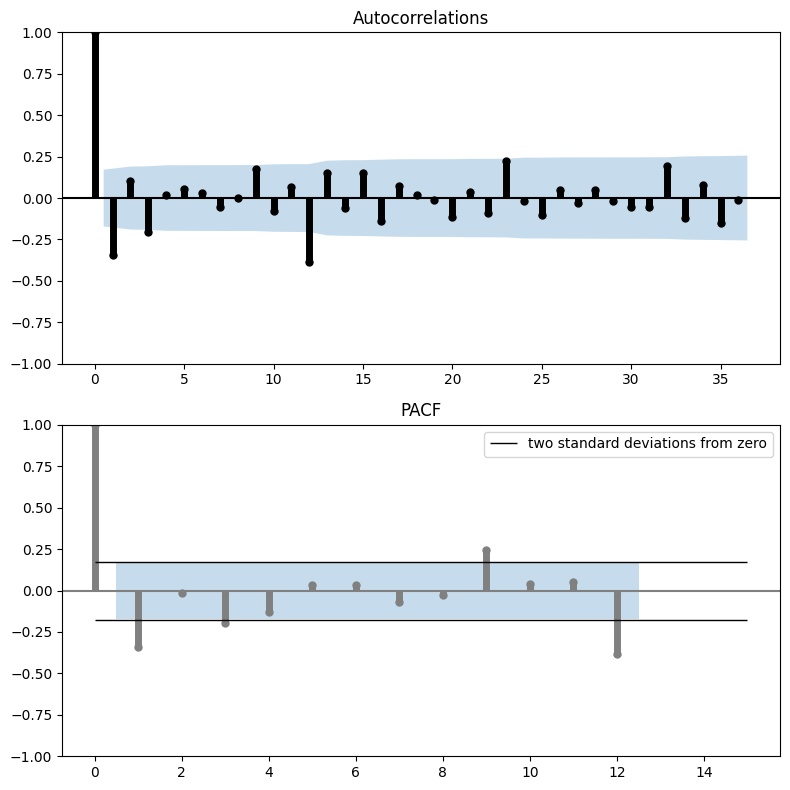

In [13]:
#계절성 제거한 ACF PACF 그래프
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,2*4))
plot_acf(df_seasonal_difference, lags= 36, ax=axes[0], title='Autocorrelations',
         color = 'black', vlines_kwargs={'colors' : 'black', 'linewidth' : 5})
plot_pacf(df_seasonal_difference, lags=12,ax=axes[1], method='ols', title='PACF', color='gray',
          vlines_kwargs={'colors': 'gray', 'linewidth':5})

axes[1].hlines(xmin=0,xmax=15,y=2*np.sqrt(1/len(df_seasonal_difference)), label='two standard deviations from zero', color='black', linewidth=1)
axes[1].hlines(xmin=0,xmax=15,y=-2*np.sqrt(1/len(df_seasonal_difference)), color='black', linewidth=1)

axes[1].legend()
plt.tight_layout()
plt.show()

In [14]:
lag_list = [(2,0,0), (0,0,1), (1,0,1),(1,0,0)]
num_of_obs = len(df[2:])
summary_table = dict()
for lag in lag_list:
    temp_perf_dict = {key: key for key in ['SSE','AIC','SBC','Q(4)','Q(8)']}
    res = ARIMA(endog = df_log_differenced[2-max(lag):],order=lag, trend='c').fit(method='innovations_mle')
    temp_perf_dict['SSE'] = round(res.sse,2)
    temp_perf_dict['AIC'] = round(num_of_obs*np.log(res.sse) + 2*len(res.params),2)
    temp_perf_dict['SBC'] = round(num_of_obs*np.log(res.sse) + len(res.params)*np.log(num_of_obs),2)

    q_statistics = res.test_serial_correlation(method='ljungbox', lags=12)[0]
    temp_perf_dict['Q(4)'] = {'q_stats' : round(q_statistics[0][3],2), 'p_val': round(q_statistics[1][3],2)}
    temp_perf_dict['Q(8)'] = {'q_stats' : round(q_statistics[0][7],2), 'p_val': round(q_statistics[1][7],2)}

    for param_name, param in zip(res.params.index, res.params):
        temp_perf_dict[param_name] = {'coef': round(param,2), 't_state': round(res.tvalues[param_name],2)}

    hashable_order = tuple([tuple(order) if isinstance(order,list) == True else order for order in res.specification['order']]) # make res. specification['order'] hashable.
    summary_table[hashable_order] = temp_perf_dict





/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3

In [15]:
result = pd.DataFrame()
for key, value in summary_table.items():
    temp_series = pd.Series(value, name=key)
    result = pd.concat([result,temp_series], axis=1)

In [16]:
result

,"(2, 0, 0)","(0, 0, 1)","(1, 0, 1)","(1, 0, 0)"
SSE,1.5,1.52,1.46,1.55
AIC,65.79,65.92,61.56,68.0
SBC,77.62,74.78,73.38,76.87
Q(4),"{'q_stats': 16.34, 'p_val': 0.0}","{'q_stats': 16.03, 'p_val': 0.0}","{'q_stats': 13.72, 'p_val': 0.01}","{'q_stats': 17.61, 'p_val': 0.0}"
Q(8),"{'q_stats': 35.67, 'p_val': 0.0}","{'q_stats': 32.07, 'p_val': 0.0}","{'q_stats': 28.29, 'p_val': 0.0}","{'q_stats': 34.06, 'p_val': 0.0}"
const,"{'coef': 0.01, 't_state': 0.94}","{'coef': 0.01, 't_state': 0.81}","{'coef': 0.01, 't_state': 0.89}","{'coef': 0.01, 't_state': 0.77}"
ar.L1,"{'coef': 0.24, 't_state': 2.28}",NaN,"{'coef': -0.59, 't_state': -3.52}","{'coef': 0.2, 't_state': 2.05}"
ar.L2,"{'coef': -0.17, 't_state': -1.77}",NaN,NaN,NaN
sigma2,"{'coef': 0.01, 't_state': 5.86}","{'coef': 0.01, 't_state': 5.94}","{'coef': 0.01, 't_state': 5.82}","{'coef': 0.01, 't_state': 5.9}"
ma.L1,NaN,"{'coef': 0.27, 't_state': 2.57}","{'coef': 0.86, 't_state': 8.67}",NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


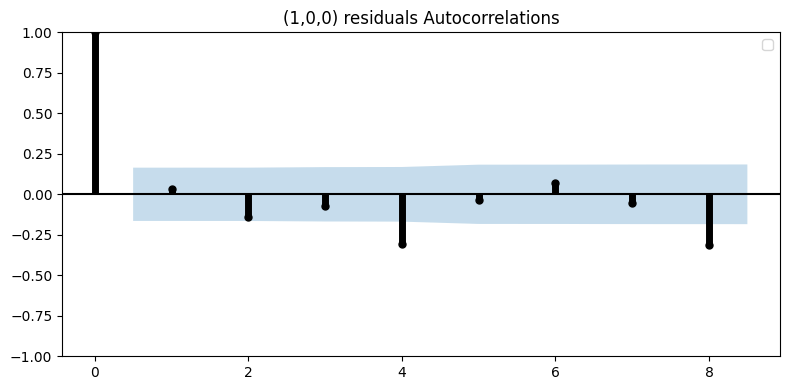

In [17]:
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
# the ACF of the last model's residuals.
plot_acf(res.resid, lags=8, ax=axes, title='(1,0,0) residuals Autocorrelations',color='black',vlines_kwargs={'colors':'black','linewidth':5})
axes.legend()
plt.tight_layout()
plt.show()

In [18]:
check = df_log_differenced.index<='1958-12-01'

df_train = df_log_differenced[check]
df_test = df_log_differenced[~check]

n_train = len(df_train)
n_test = len(df_test)

f1, f1_error = [], []
f2, f2_error = [], []
ground_truth = []
MAPE_f1 = []
MAPE_f2 = []

for i in range(n_test):
    crt_time = i + n_train
    x_train = df_log_differenced[:crt_time]
    model_f1 = ARIMA(endog=x_train, order = (0,0,1), trend='c').fit(method="innovations_mle")
    model_f2 = ARIMA(endog=x_train, order = (1,0,1), trend='c').fit(method="innovations_mle")
    forcast_f1 = model_f1.forecast(steps=1)
    forcast_f2 = model_f2.forecast(steps=1)

    #inverse-diff
    forcast_f1 = np.exp(forcast_f1 + np.log(df.iloc[crt_time-1][0])+np.log(df.iloc[crt_time-12][0])-np.log(df.iloc[crt_time-13][0]))
    forcast_f2 = np.exp(forcast_f2 + np.log(df.iloc[crt_time-1][0])+np.log(df.iloc[crt_time-12][0])-np.log(df.iloc[crt_time-13][0]))




    y = df.iloc[crt_time][0]
    ground_truth.append(y)

    f1.append(forcast_f1)
    f1_error.append(y-forcast_f1[0])
    f2.append(forcast_f2[0])
    f2_error.append(y-forcast_f2[0])
    MAPE_f1.append(abs(y-forcast_f1[0])/abs(y))
    MAPE_f2.append(abs(y-forcast_f2[0])/abs(y))



/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3

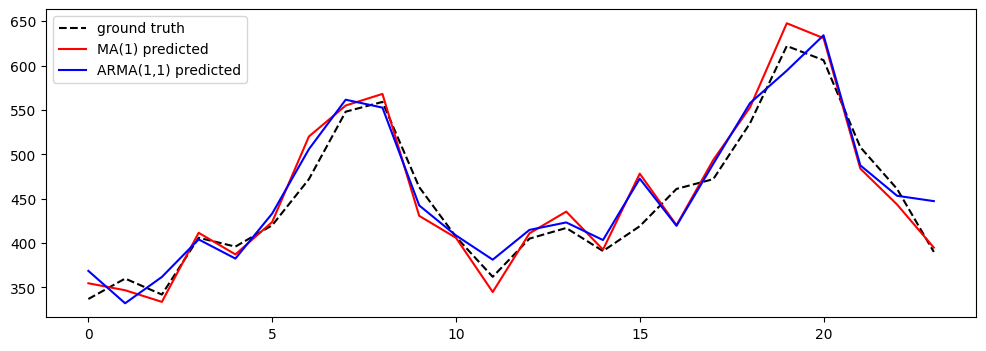

In [19]:
# plot the results
plt.figure(figsize=(12,4))
plt.plot(ground_truth, label='ground truth', color='k', linestyle='--')
plt.plot(f1, label='MA(1) predicted', color='r')
plt.plot(f2, label='ARMA(1,1) predicted', color='blue')

plt.legend()
plt.show()

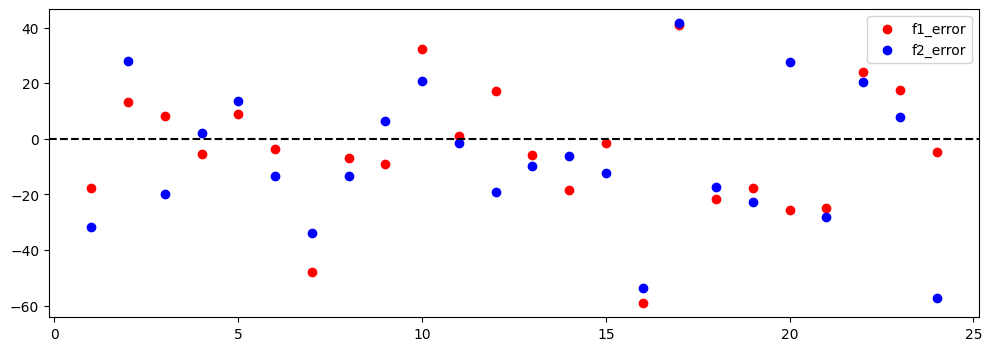

In [20]:
# plot the results
plt.figure(figsize=(12,4))
plt.scatter(np.linspace(1,len(f1_error),len(f1_error)), f1_error, label='f1_error', color='r')
plt.scatter(np.linspace(1,len(f2_error),len(f2_error)), f2_error, label='f2_error', color='blue')

plt.axhline(y=0, color='k', linestyle='--')
plt.legend()
plt.show()

In [21]:
f1_error = pd.Series(f1_error)
f2_error = pd.Series(f2_error)
MAPE_f1 = pd.Series(MAPE_f1)
MAPE_f2 = pd.Series(MAPE_f2)
print(f'mean squared prediction error of MA(1) : {round((f1_error**2).mean(),4)}')
print(f'mean squared prediction error of ARMA(1,1) : {round((f2_error**2).mean(),4)}')

print(f'mean absolute prediction error of MA(1) : {round(MAPE_f1.mean()*100,4)}%')
print(f'mean absolute prediction error of ARMA(1,1) : {round(MAPE_f2.mean()*100,4)}%')


mean squared prediction error of MA(1) : 540.9414
mean squared prediction error of ARMA(1,1) : 654.3265
mean absolute prediction error of MA(1) : 4.003%
mean absolute prediction error of ARMA(1,1) : 4.8812%


In [22]:
lag_list = [(1,0,0),(0,0,1), (1,0,1)]
seasonal_lag_list = [(1,0,0,12), (0,0,1,12), (1,0,1,12),(0,0,0,12)]
num_of_obs = len(df[2:])
summary_table = dict()
for lag in lag_list:
    temp_perf_dict = {key: key for key in ['SSE','AIC','SBC','Q(4)','Q(8)']}
    for s_lag in seasonal_lag_list:
        res = SARIMAX(endog = df_seasonal_difference[2-max(lag):],order=lag,seasonal_order=s_lag, trend='c').fit()
        temp_perf_dict['SSE'] = round(res.sse,2)
        temp_perf_dict['AIC'] = round(num_of_obs*np.log(res.sse) + 2*len(res.params),2)
        temp_perf_dict['SBC'] = round(num_of_obs*np.log(res.sse) + len(res.params)*np.log(num_of_obs),2)

        q_statistics = res.test_serial_correlation(method='ljungbox', lags=12)[0]
        temp_perf_dict['Q(4)'] = {'q_stats' : round(q_statistics[0][3],2), 'p_val': round(q_statistics[1][3],2)}
        temp_perf_dict['Q(8)'] = {'q_stats' : round(q_statistics[0][7],2), 'p_val': round(q_statistics[1][7],2)}


        for param_name, param in zip(res.params.index, res.params):
            temp_perf_dict[param_name] = {'coef': round(param,2), 't_state': round(res.tvalues[param_name],2)}

        hashable_order = tuple([tuple(order) if isinstance(order,list) == True else order for order in res.specification['order']]) # make res. specification['order']
        hashable_s_order = tuple([tuple(s_order) if isinstance(s_order,list) ==True else s_order for s_order in res.specification['seasonal_order']])
        summary_table[hashable_order,hashable_s_order] = temp_perf_dict






RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81903D+00    |proj g|=  4.83399D+00

At iterate    5    f= -1.83167D+00    |proj g|=  4.12236D-02

At iterate   10    f= -1.83207D+00    |proj g|=  7.28675D-01

At iterate   15    f= -1.83260D+00    |proj g|=  4.42443D-03

At iterate   20    f= -1.83262D+00    |proj g|=  3.42109D-02

At iterate   25    f= -1.83263D+00    |proj g|=  8.91645D-05


/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     54      1     0     0   8.916D-05  -1.833D+00
  F =  -1.8326251477454776     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.83198D+00    |proj g|=  5.44141D+00

At iterate    5    f= -1.84843D+00    |proj g|=  1.25710D-01

At iterate   10    f= -1.85247D+00    |proj g|=  1.96247D+00

At iterate   15    f= -1.85671D+00    |proj g|=  1.24265D-02

At iter

/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so i

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.83010D+00    |proj g|=  5.33442D+00

At iterate    5    f= -1.84669D+00    |proj g|=  8.90993D-01

At iterate   10    f= -1.85326D+00    |proj g|=  1.19834D-01

At iterate   15    f= -1.85331D+00    |proj g|=  2.00624D-01

At iterate   20    f= -1.85553D+00    |proj g|=  1.12827D+00

At iterate   25    f= -1.85650D+00    |proj g|=  3.37852D-02

At iterate   30    f= -1.85772D+00    |proj g|=  1.71266D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconst

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82161D+00    |proj g|=  5.30660D+00

At iterate    5    f= -1.83755D+00    |proj g|=  1.49286D-01

At iterate   10    f= -1.84038D+00    |proj g|=  1.82417D+00

At iterate   15    f= -1.84226D+00    |proj g|=  6.72754D-03

At iterate   20    f= -1.84227D+00    |proj g|=  1.44498D-01

At iterate   25    f= -1.84230D+00    |proj g|=  1.11526D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     34      1     0     0   9.387D-04  -1.842D+00
  F =  -1.8422962686311

/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.86412D+00    |proj g|=  7.08582D-01

At iterate   25    f= -1.86451D+00    |proj g|=  3.63513D-02

At iterate   30    f= -1.86463D+00    |proj g|=  4.17494D-01

At iterate   35    f= -1.86605D+00    |proj g|=  4.31520D-01

At iterate   40    f= -1.86616D+00    |proj g|=  7.93974D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     54      1     0     0   4.222D-05  -1.866D+00
  F =  -1.8661586501920699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconst

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81958D+00    |proj g|=  4.94475D+00

At iterate    5    f= -1.83300D+00    |proj g|=  1.01699D-01

At iterate   10    f= -1.83452D+00    |proj g|=  4.58578D-01

At iterate   15    f= -1.83476D+00    |proj g|=  3.92158D-02

At iterate   20    f= -1.83563D+00    |proj g|=  2.53513D-01

At iterate   25    f= -1.83609D+00    |proj g|=  2.61722D-02

At iterate   30    f= -1.84069D+00    |proj g|=  1.85827D+00

At iterate   35    f= -1.84255D+00    |proj g|=  6.88278D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   30    f= -1.86304D+00    |proj g|=  1.94601D+00

At iterate   35    f= -1.86604D+00    |proj g|=  3.46348D-01

At iterate   40    f= -1.86619D+00    |proj g|=  8.05868D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     64      1     0     0   8.059D-04  -1.866D+00
  F =  -1.8661936152266256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.83045D+00    |proj g|=  5.43475D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.85562D+00    |proj g|=  3.68202D-01

At iterate   20    f= -1.85905D+00    |proj g|=  1.68791D+00

At iterate   25    f= -1.86167D+00    |proj g|=  3.42569D-02

At iterate   30    f= -1.86189D+00    |proj g|=  5.71310D-01

At iterate   35    f= -1.86236D+00    |proj g|=  3.54050D-02

At iterate   40    f= -1.86238D+00    |proj g|=  1.09492D-01

At iterate   45    f= -1.86315D+00    |proj g|=  1.01848D+00

At iterate   50    f= -1.86710D+00    |proj g|=  6.99425D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63      1     0     0   6.994D-01  -1.867D+00
  F =  -1.86710230324

/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [23]:
result = pd.DataFrame()
for key, value in summary_table.items():
    temp_series = pd.Series(value, name=key)
    result = pd.concat([result,temp_series], axis=1)

In [24]:
result

,"((1, 0, 0), (1, 0, 0, 12))","((1, 0, 0), (0, 0, 1, 12))","((1, 0, 0), (1, 0, 1, 12))","((1, 0, 0), (0, 0, 0, 12))","((0, 0, 1), (1, 0, 0, 12))","((0, 0, 1), (0, 0, 1, 12))","((0, 0, 1), (1, 0, 1, 12))","((0, 0, 1), (0, 0, 0, 12))","((1, 0, 1), (1, 0, 0, 12))","((1, 0, 1), (0, 0, 1, 12))","((1, 0, 1), (1, 0, 1, 12))","((1, 0, 1), (0, 0, 0, 12))"
SSE,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24
AIC,-196.8,-196.8,-196.8,-196.8,-197.8,-197.8,-197.8,-197.8,-196.17,-196.17,-196.17,-196.17
SBC,-187.93,-187.93,-187.93,-187.93,-188.93,-188.93,-188.93,-188.93,-184.35,-184.35,-184.35,-184.35
Q(4),"{'q_stats': 6.8, 'p_val': 0.15}","{'q_stats': 6.8, 'p_val': 0.15}","{'q_stats': 6.8, 'p_val': 0.15}","{'q_stats': 6.8, 'p_val': 0.15}","{'q_stats': 5.69, 'p_val': 0.22}","{'q_stats': 5.69, 'p_val': 0.22}","{'q_stats': 5.69, 'p_val': 0.22}","{'q_stats': 5.69, 'p_val': 0.22}","{'q_stats': 5.07, 'p_val': 0.28}","{'q_stats': 5.07, 'p_val': 0.28}","{'q_stats': 5.07, 'p_val': 0.28}","{'q_stats': 5.07, 'p_val': 0.28}"
Q(8),"{'q_stats': 8.74, 'p_val': 0.36}","{'q_stats': 8.74, 'p_val': 0.36}","{'q_stats': 8.74, 'p_val': 0.36}","{'q_stats': 8.74, 'p_val': 0.36}","{'q_stats': 6.75, 'p_val': 0.56}","{'q_stats': 6.75, 'p_val': 0.56}","{'q_stats': 6.75, 'p_val': 0.56}","{'q_stats': 6.75, 'p_val': 0.56}","{'q_stats': 5.95, 'p_val': 0.65}","{'q_stats': 5.95, 'p_val': 0.65}","{'q_stats': 5.95, 'p_val': 0.65}","{'q_stats': 5.95, 'p_val': 0.65}"
intercept,"{'coef': 0.0, 't_state': 0.0}","{'coef': 0.0, 't_state': 0.0}","{'coef': 0.0, 't_state': 0.0}","{'coef': 0.0, 't_state': 0.0}","{'coef': 0.0, 't_state': 0.03}","{'coef': 0.0, 't_state': 0.03}","{'coef': 0.0, 't_state': 0.03}","{'coef': 0.0, 't_state': 0.03}","{'coef': 0.0, 't_state': 0.04}","{'coef': 0.0, 't_state': 0.04}","{'coef': 0.0, 't_state': 0.04}","{'coef': 0.0, 't_state': 0.04}"
ar.L1,"{'coef': -0.34, 't_state': -5.18}","{'coef': -0.34, 't_state': -5.18}","{'coef': -0.34, 't_state': -5.18}","{'coef': -0.34, 't_state': -5.18}",NaN,NaN,NaN,NaN,"{'coef': 0.16, 't_state': 0.88}","{'coef': 0.16, 't_state': 0.88}","{'coef': 0.16, 't_state': 0.88}","{'coef': 0.16, 't_state': 0.88}"
ar.S.L12,"{'coef': -0.08, 't_state': -0.41}","{'coef': -0.08, 't_state': -0.41}","{'coef': -0.08, 't_state': -0.41}","{'coef': -0.08, 't_state': -0.41}","{'coef': -0.11, 't_state': -0.59}","{'coef': -0.11, 't_state': -0.59}","{'coef': -0.11, 't_state': -0.59}","{'coef': -0.11, 't_state': -0.59}","{'coef': -0.08, 't_state': -0.36}","{'coef': -0.08, 't_state': -0.36}","{'coef': -0.08, 't_state': -0.36}","{'coef': -0.08, 't_state': -0.36}"
sigma2,"{'coef': 0.0, 't_state': 9.6}","{'coef': 0.0, 't_state': 9.6}","{'coef': 0.0, 't_state': 9.6}","{'coef': 0.0, 't_state': 9.6}","{'coef': 0.0, 't_state': 8.99}","{'coef': 0.0, 't_state': 8.99}","{'coef': 0.0, 't_state': 8.99}","{'coef': 0.0, 't_state': 8.99}","{'coef': 0.0, 't_state': 8.82}","{'coef': 0.0, 't_state': 8.82}","{'coef': 0.0, 't_state': 8.82}","{'coef': 0.0, 't_state': 8.82}"
ma.S.L12,"{'coef': -0.51, 't_state': -2.39}","{'coef': -0.51, 't_state': -2.39}","{'coef': -0.51, 't_state': -2.39}","{'coef': -0.51, 't_state': -2.39}","{'coef': -0.48, 't_state': -2.2}","{'coef': -0.48, 't_state': -2.2}","{'coef': -0.48, 't_state': -2.2}","{'coef': -0.48, 't_state': -2.2}","{'coef': -0.51, 't_state': -2.29}","{'coef': -0.51, 't_state': -2.29}","{'coef': -0.51, 't_state': -2.29}","{'coef': -0.51, 't_state': -2.29}"


In [25]:
check = df_seasonal_difference.index<='1958-12-01'

df_train = df_seasonal_difference[check]
df_test = df_seasonal_difference[~check]

n_train = len(df_train)
n_test = len(df_test)

f, f_error = [], []
MAPE = []
ground_truth = []

for i in range(n_test):
    crt_time = i + n_train
    x_train = df_seasonal_difference[:crt_time]

    model = SARIMAX(endog=x_train, order = (0,0,1),seasonal_order=(0,0,0,12), trend='c').fit()
    forecast = model.forecast(steps=1)


    forecast = np.exp(forecast + np.log(df.iloc[crt_time-1][0])+np.log(df.iloc[crt_time-12][0])-np.log(df.iloc[crt_time-13][0]))
    y = df.iloc[crt_time][0]
    ground_truth.append(y)
    f.append(forecast)
    f_error.append(y-forecast[0])
    MAPE.append(abs(y-forecast[0])/abs(y))




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.72010D+00    |proj g|=  9.41568D-01


/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconst


At iterate    5    f= -1.72073D+00    |proj g|=  2.86571D-01

At iterate   10    f= -1.72120D+00    |proj g|=  2.47179D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     19      1     0     0   6.251D-06  -1.721D+00
  F =  -1.7212040105190660     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.71920D+00    |proj g|=  9.28173D-01

At iterate    5    f= -1.71971D+00    |proj g|=  2.43462D-01

At iter

/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconst

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.72383D+00    |proj g|=  8.88317D-01

At iterate    5    f= -1.72430D+00    |proj g|=  1.77038D-01

At iterate   10    f= -1.72459D+00    |proj g|=  5.50059D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     19      1     0     0   3.180D-05  -1.725D+00
  F =  -1.7245933721538051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconst

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.73545D+00    |proj g|=  9.12548D-01

At iterate    5    f= -1.73590D+00    |proj g|=  1.66068D-01

At iterate   10    f= -1.73639D+00    |proj g|=  1.72750D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   4.130D-06  -1.736D+00
  F =  -1.7364156186850972     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconst

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.74450D+00    |proj g|=  8.71730D-01

At iterate    5    f= -1.74491D+00    |proj g|=  1.43276D-01

At iterate   10    f= -1.74536D+00    |proj g|=  1.74491D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   8.243D-04  -1.745D+00
  F =  -1.7454031622184192     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconst

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.71897D+00    |proj g|=  9.44348D-01

At iterate    5    f= -1.71954D+00    |proj g|=  2.83362D-01

At iterate   10    f= -1.72015D+00    |proj g|=  1.65907D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   5.998D-06  -1.720D+00
  F =  -1.7201524751680421     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     31      1     0     0   1.811D-03  -1.728D+00
  F =  -1.7275675133107189     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.72855D+00    |proj g|=  9.01899D-01

At iterate    5    f= -1.72903D+00    |proj g|=  2.52106D-01

At iterate   10    f= -1.72968D+00    |proj g|=  4.87367D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/easydong/opt/anaconda3/envs/testStudy/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


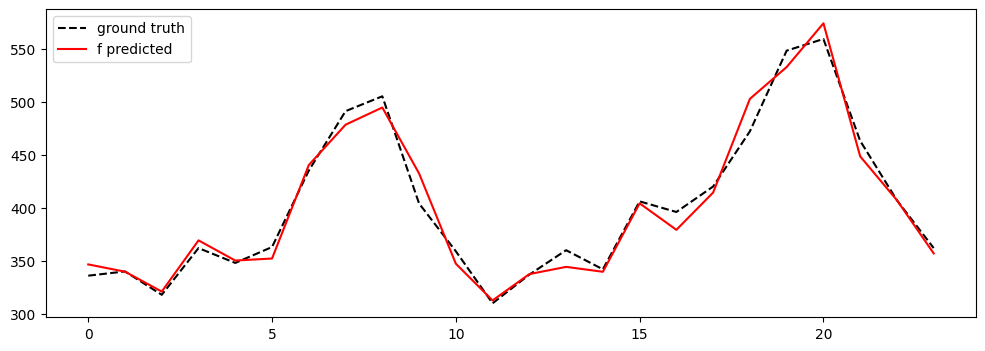

In [26]:
# plot the results
plt.figure(figsize=(12,4))
plt.plot(ground_truth, label='ground truth', color='k', linestyle='--')
plt.plot(f, label='f predicted', color='r')
plt.legend()
plt.show()

In [27]:
f_error = pd.Series(f_error)
MAPE = pd.Series(MAPE)
print(f'mean squared prediction error of f : {round((f_error**2).mean(),4)}')
print(f'mean absolute prediction error of f : {round(MAPE.mean()*100,4)}%')

mean squared prediction error of f : 156.0654
mean absolute prediction error of f : 2.2737%


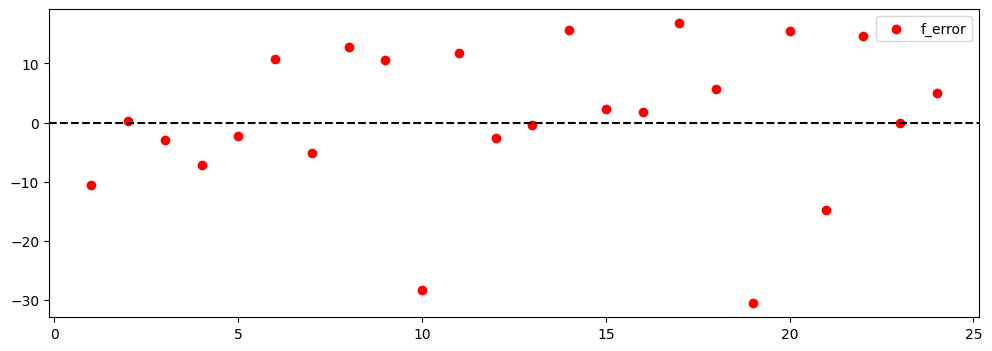

In [28]:
# plot the results
plt.figure(figsize=(12,4))
plt.scatter(np.linspace(1,len(f_error),len(f_error)), f_error, label='f_error', color='r')

plt.axhline(y=0, color='k', linestyle='--')
plt.legend()
plt.show()

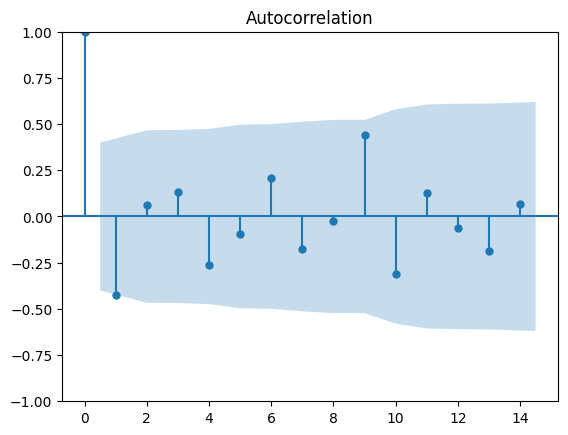

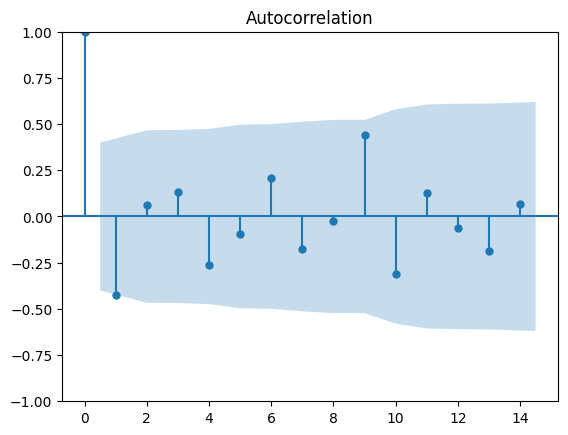

In [29]:
plot_acf(f_error)